# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [110]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)



C:\Users\Nour_Azab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


    age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  18.0        NaN  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4                NaN    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education       48842 non-null  category
 4   education-num   48842 non-null  float64 
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  float64 
 11  capital-loss    48842 non-null  float64 
 12  hours-per-week  48842 non-null  float64 
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.7 MB


In [113]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [114]:
for col in ["workclass", "occupation","native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [115]:
df["class"].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [116]:
df.duplicated().sum()

53

In [117]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [118]:
X = df.drop(columns="class")
y = df["class"]

# EDA

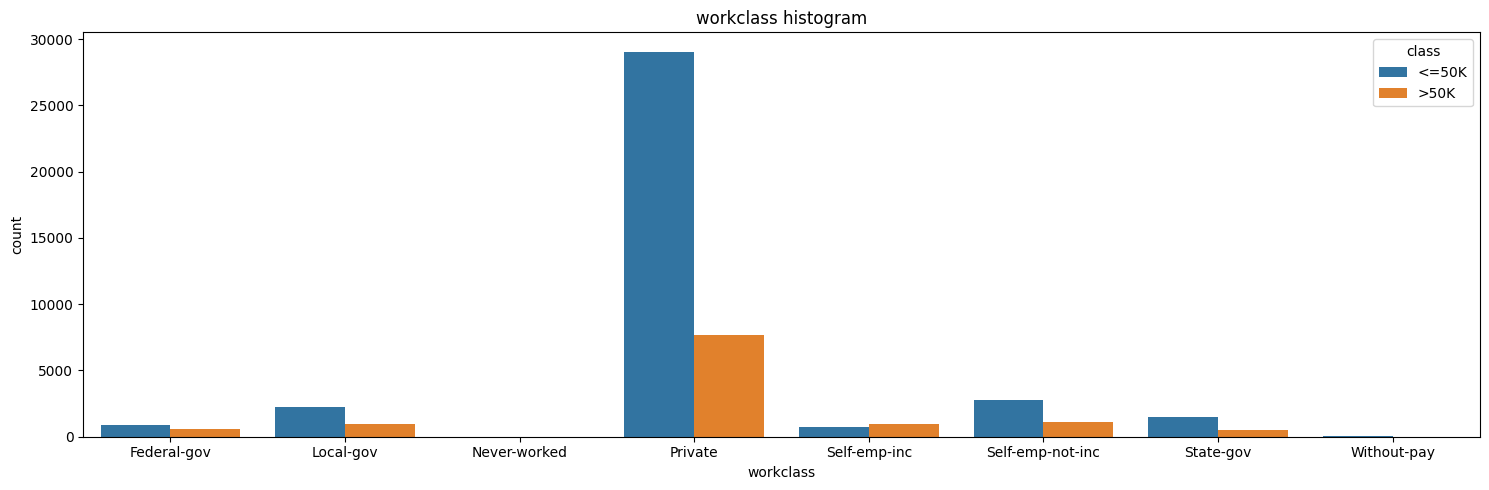

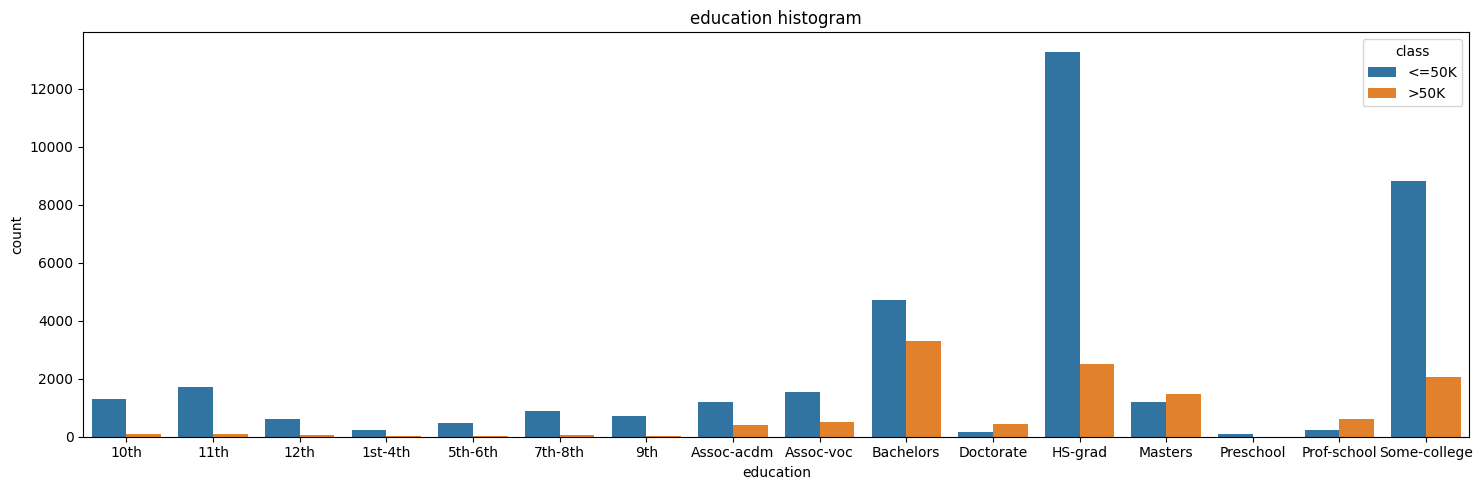

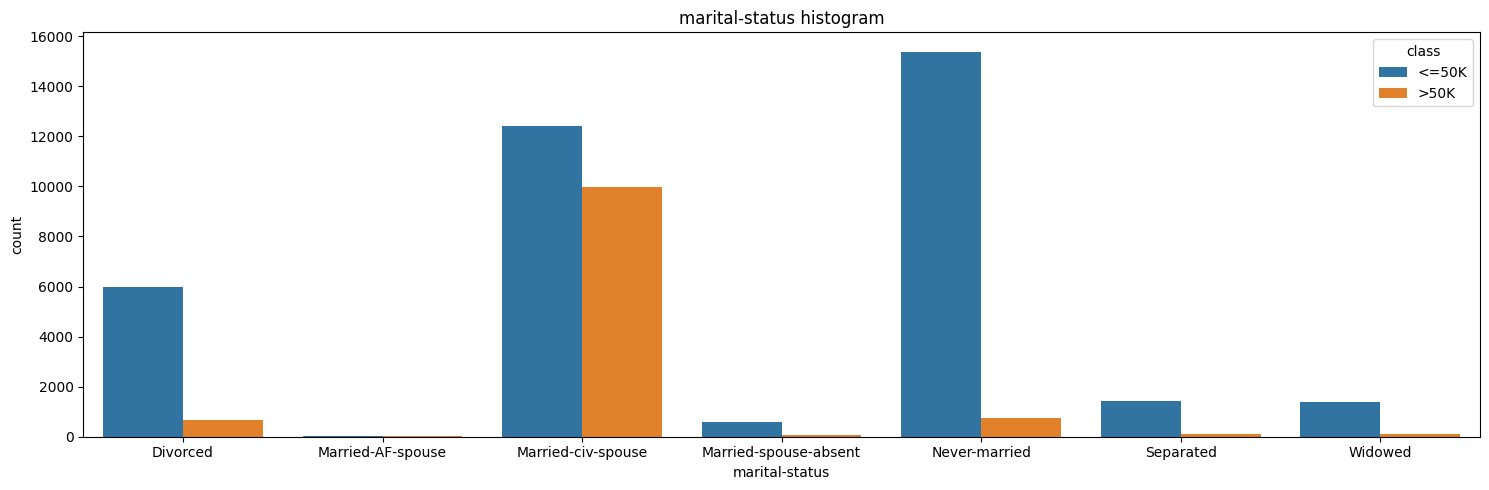

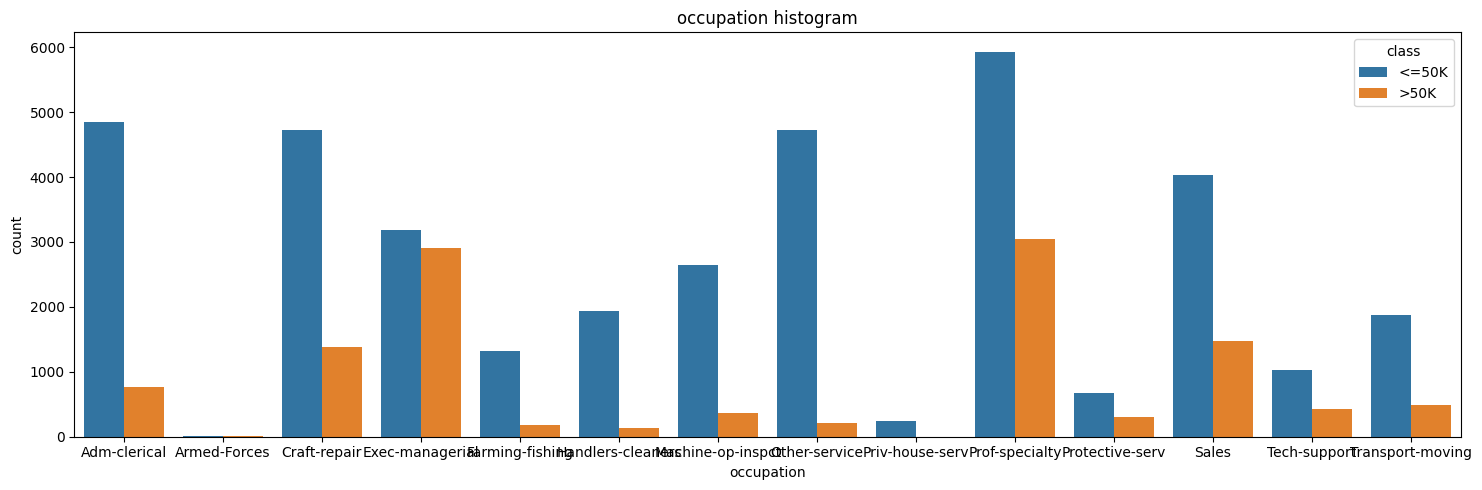

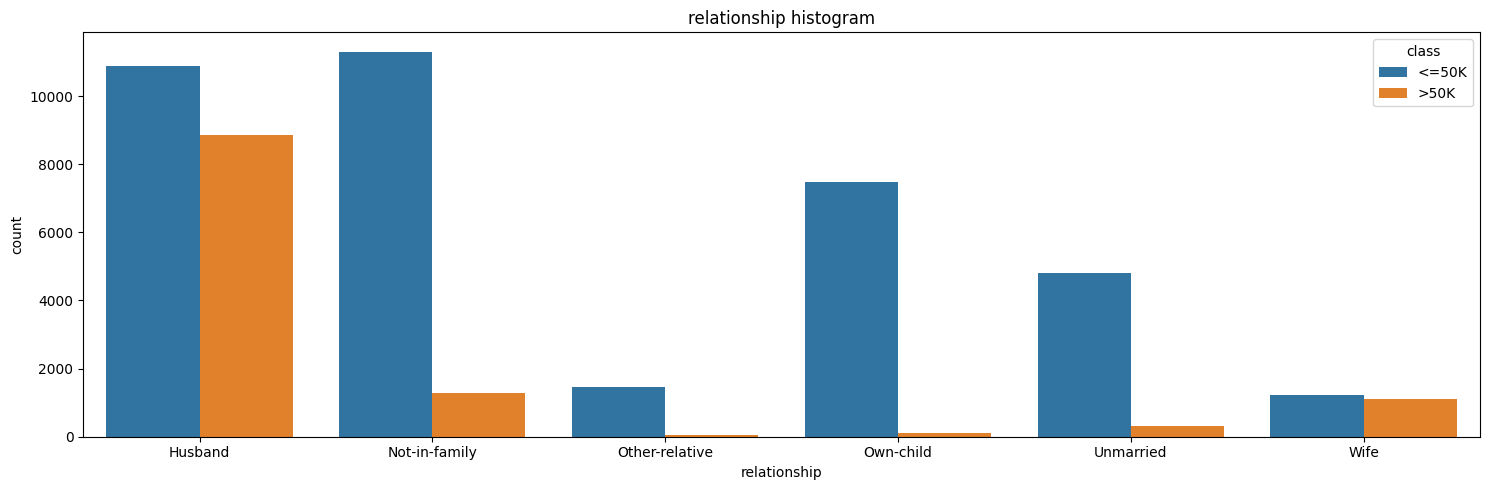

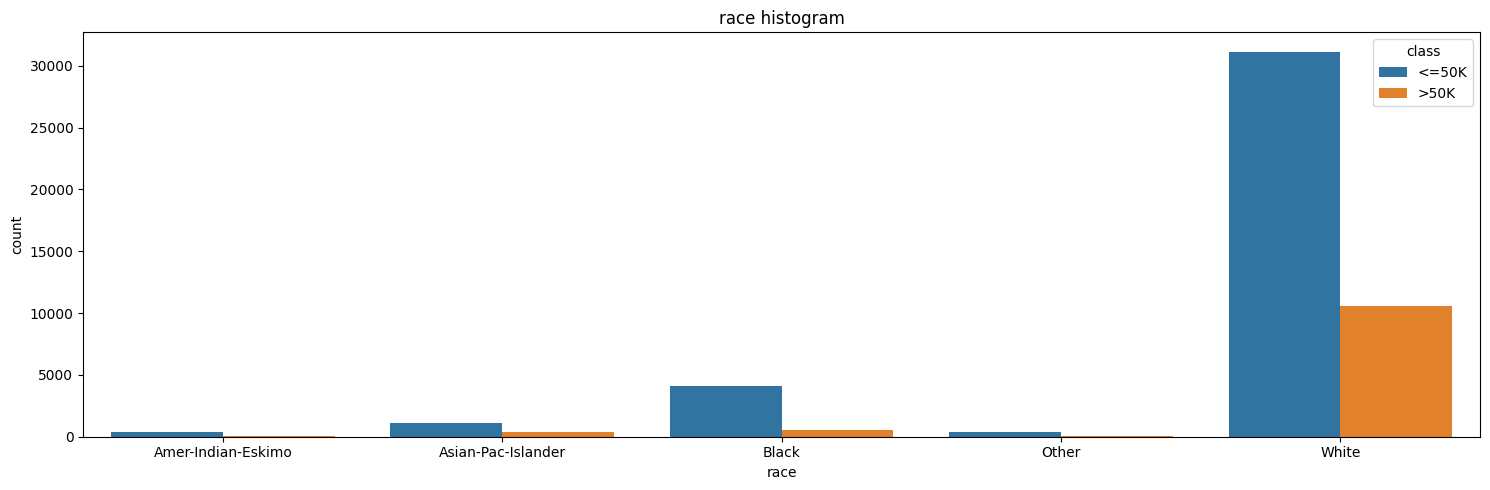

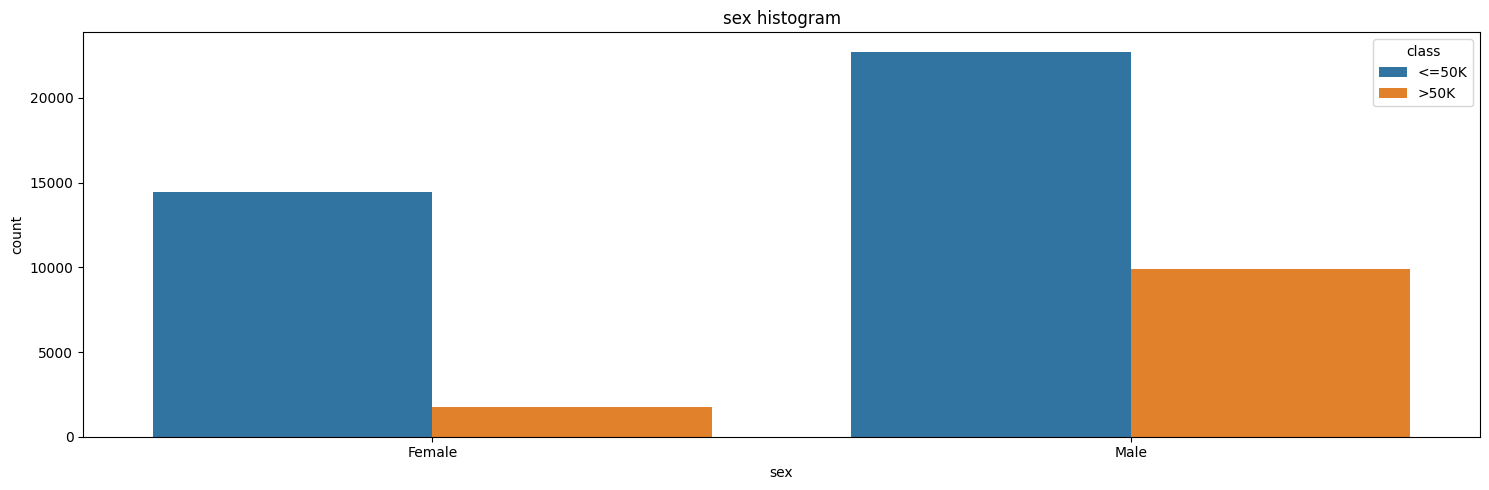

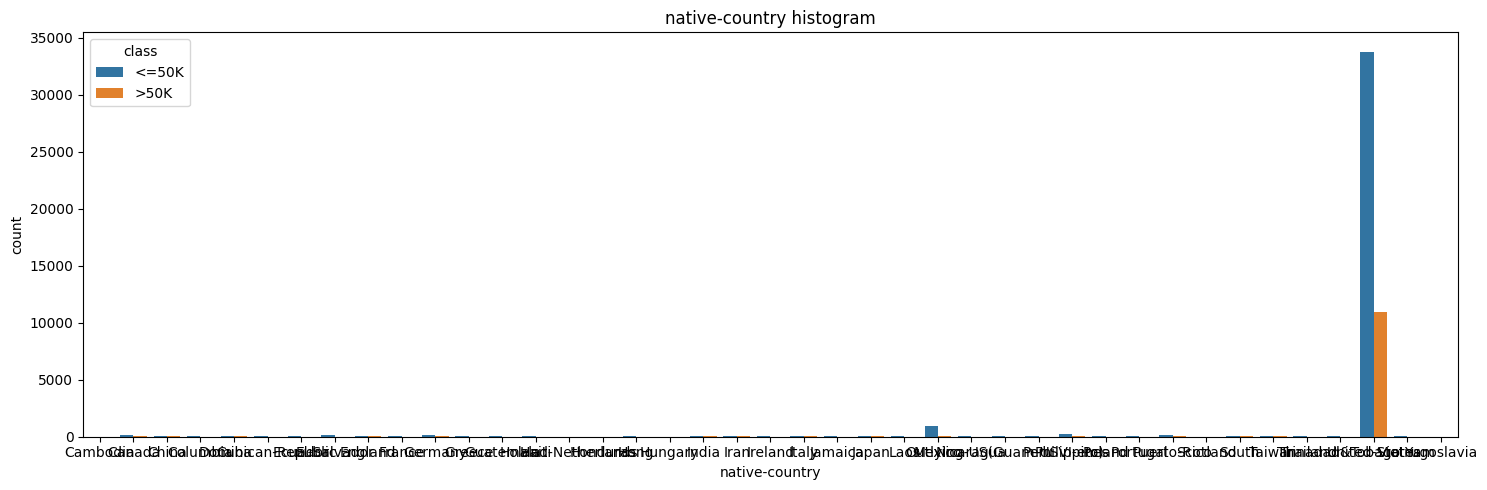

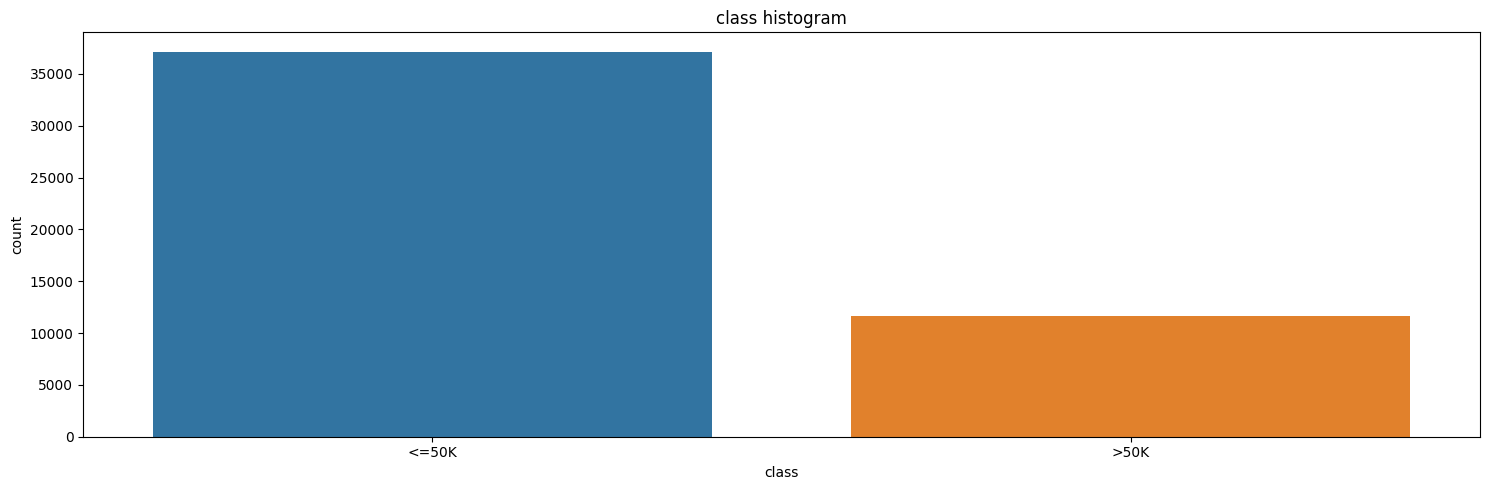

In [119]:
categorical_colms = df.select_dtypes(include=['category']).columns
for i in categorical_colms:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=i, data=df,hue='class')
    plt.title(f'{i} histogram')
    plt.tight_layout()
    plt.show()



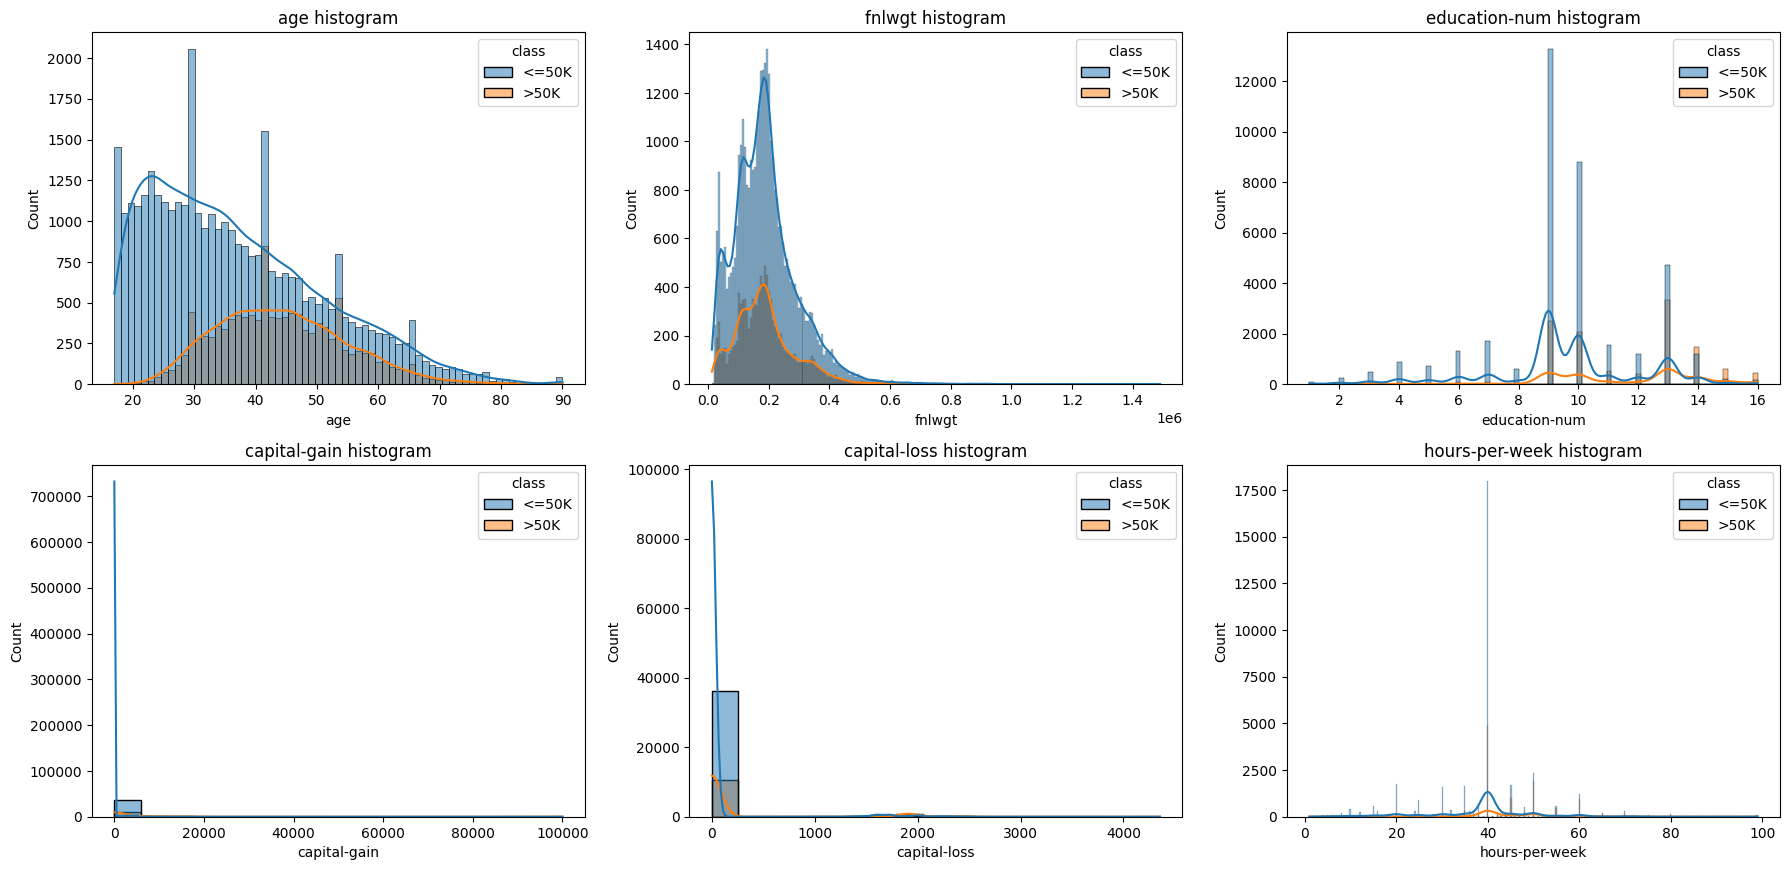

In [120]:
numerical_colms = df.select_dtypes(include= 'float64')
plt.figure(figsize=(18, 30))
for i, bf in enumerate(numerical_colms):
    plt.subplot(7, 3, i+1)
    sns.histplot(x=bf, data=df, kde=True, hue='class')

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

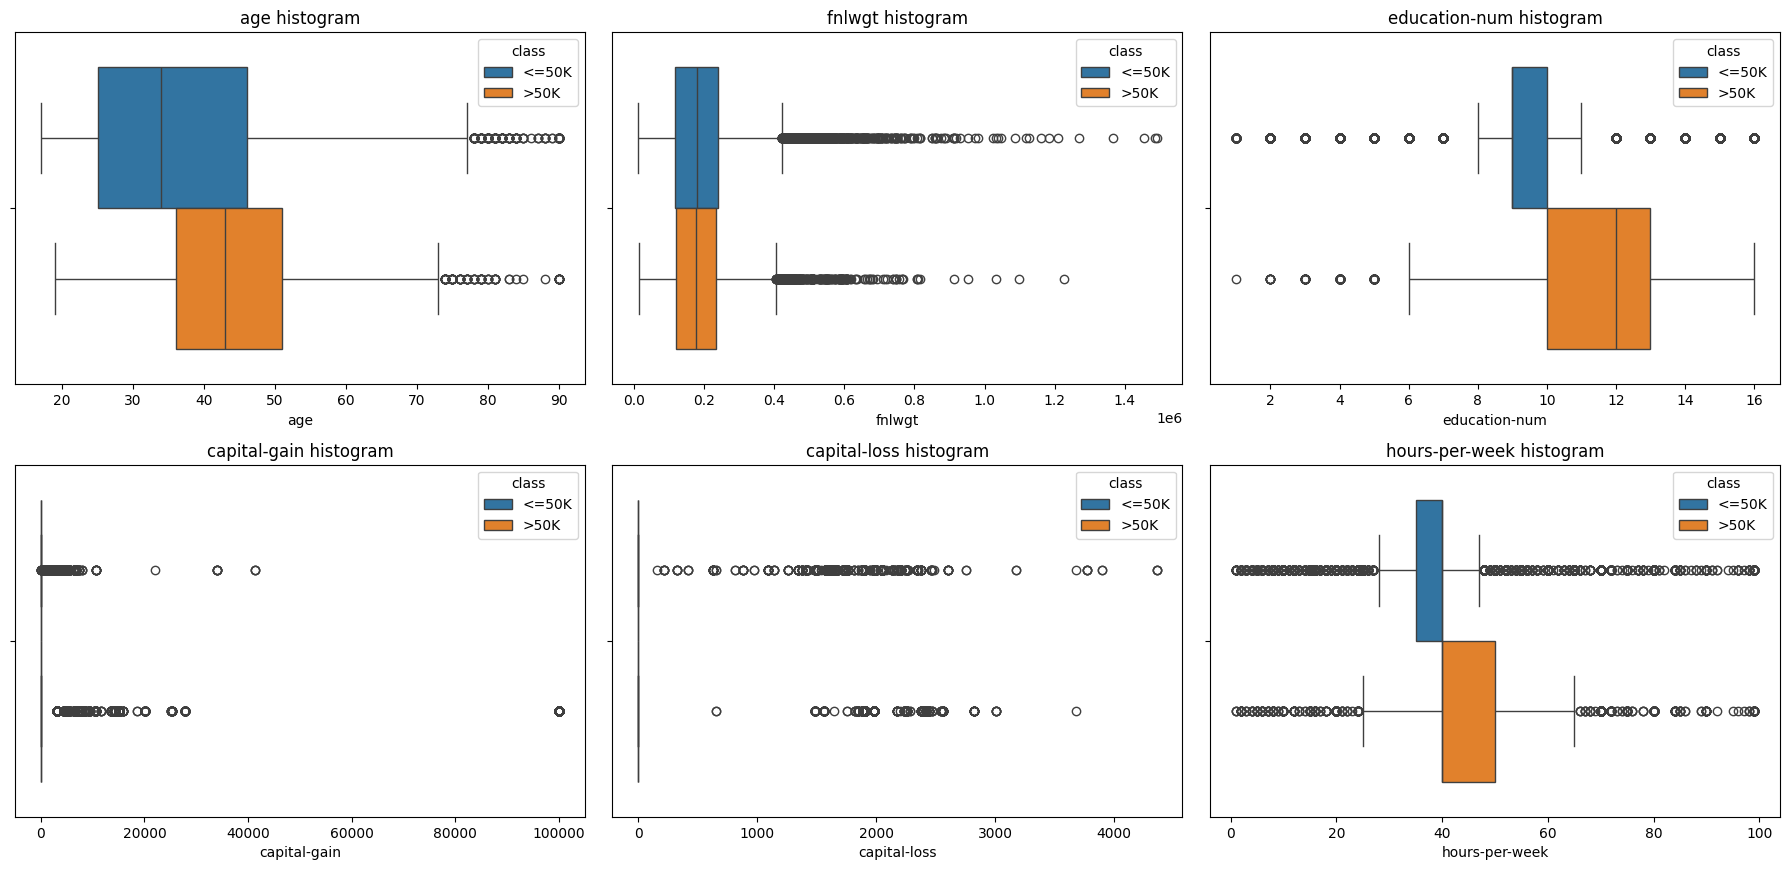

In [121]:
numerical_colms = df.select_dtypes(include= 'float64')
plt.figure(figsize=(18, 30))
for i, bf in enumerate(numerical_colms):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x=bf, data=df, hue='class')

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [122]:
X.drop(columns='education',inplace= True)

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education-num   48842 non-null  float64 
 4   marital-status  48842 non-null  category
 5   occupation      48842 non-null  category
 6   relationship    48842 non-null  category
 7   race            48842 non-null  category
 8   sex             48842 non-null  category
 9   capital-gain    48842 non-null  float64 
 10  capital-loss    48842 non-null  float64 
 11  hours-per-week  48842 non-null  float64 
 12  native-country  48842 non-null  category
dtypes: category(7), float64(6)
memory usage: 2.6 MB


In [124]:
y = y.map({">50K": 1, "<=50K": 0})
y = y.astype("int32").to_numpy()

In [125]:
from sklearn.compose import ColumnTransformer

onehot_features = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
robustscale_features = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week","education-num"]


preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_features)
        ,("robust", RobustScaler(), robustscale_features)
    ])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [127]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [128]:
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)


## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [129]:
histories = {}

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train_prep.shape[1],)))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.02)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50)
histories["SGD"] = history1

Epoch 1/50
1069/1069 [==============================] - 2s 2ms/step - loss: 13.7892 - accuracy: 0.7891 - val_loss: 0.3638 - val_accuracy: 0.8220
Epoch 2/50
1069/1069 [==============================] - 2s 2ms/step - loss: 0.3663 - accuracy: 0.8140 - val_loss: 0.3554 - val_accuracy: 0.8239
Epoch 3/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3593 - accuracy: 0.8150 - val_loss: 0.3530 - val_accuracy: 0.8231
Epoch 4/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3563 - accuracy: 0.8169 - val_loss: 0.3584 - val_accuracy: 0.8241
Epoch 5/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3548 - accuracy: 0.8179 - val_loss: 0.3533 - val_accuracy: 0.8215
Epoch 6/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3538 - accuracy: 0.8189 - val_loss: 0.3508 - val_accuracy: 0.8227
Epoch 7/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3529 - accuracy: 0.8197 - val_loss: 0.3529 - val_accuracy

In [131]:
loss, acc = model1.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.821
Model loss on test data: 0.358


In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train_prep.shape[1],)))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.001,momentum=0.8)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50)
histories["SGD with momentum"] = history2

Epoch 1/50
1069/1069 [==============================] - 2s 2ms/step - loss: 1.6723 - accuracy: 0.7616 - val_loss: 0.4190 - val_accuracy: 0.7914
Epoch 2/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.4246 - accuracy: 0.7736 - val_loss: 0.3944 - val_accuracy: 0.7883
Epoch 3/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3916 - accuracy: 0.7890 - val_loss: 0.3758 - val_accuracy: 0.8044
Epoch 4/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3797 - accuracy: 0.7934 - val_loss: 0.3689 - val_accuracy: 0.7980
Epoch 5/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3738 - accuracy: 0.7959 - val_loss: 0.3647 - val_accuracy: 0.7993
Epoch 6/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3698 - accuracy: 0.7974 - val_loss: 0.3618 - val_accuracy: 0.8048
Epoch 7/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.7970 - val_loss: 0.3596 - val_accuracy:

In [133]:
loss, acc = model2.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.822
Model loss on test data: 0.356


higher momentum has higher accuracy and lower loss

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(X_train_prep.shape[1],)))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50)
histories["adam"] = history3

Epoch 1/50
1069/1069 [==============================] - 2s 2ms/step - loss: 4.8514 - accuracy: 0.8138 - val_loss: 2.2803 - val_accuracy: 0.8231
Epoch 2/50
1069/1069 [==============================] - 2s 2ms/step - loss: 2.6302 - accuracy: 0.8223 - val_loss: 0.6614 - val_accuracy: 0.8372
Epoch 3/50
1069/1069 [==============================] - 2s 1ms/step - loss: 1.6022 - accuracy: 0.8320 - val_loss: 0.4400 - val_accuracy: 0.8437
Epoch 4/50
1069/1069 [==============================] - 2s 2ms/step - loss: 0.9611 - accuracy: 0.8361 - val_loss: 0.3777 - val_accuracy: 0.8516
Epoch 5/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.6944 - accuracy: 0.8396 - val_loss: 0.4640 - val_accuracy: 0.8445
Epoch 6/50
1069/1069 [==============================] - 2s 2ms/step - loss: 0.5055 - accuracy: 0.8446 - val_loss: 0.3127 - val_accuracy: 0.8608
Epoch 7/50
1069/1069 [==============================] - 2s 1ms/step - loss: 0.5147 - accuracy: 0.8437 - val_loss: 0.3139 - val_accuracy:

In [135]:
loss, acc = model3.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.850
Model loss on test data: 0.413


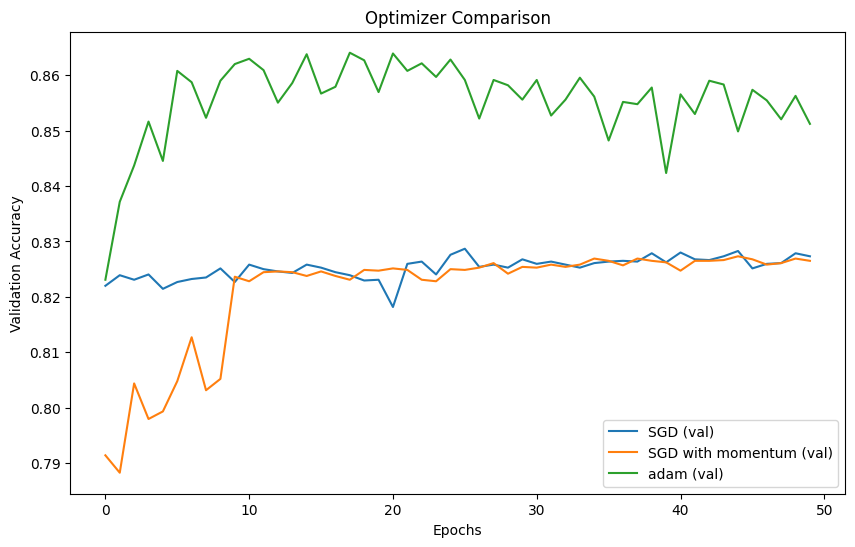

In [136]:
plt.figure(figsize=(10,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name} (val)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Optimizer Comparison")
plt.show()

ADAM has the best val accuracy and faster convergence as it reaches the lowest loss in the before SGD and SGD+Momentum

ADAM also has better generalization as it has the least difference between train and val accuracy

ADAM is better than Plain SGD as it updates its learning rate according to past gradients and it handles onehot encoded well

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=10,batch_size=1)


Epoch 1/10
34189/34189 [==============================] - 45s 1ms/step - loss: 4.7678 - accuracy: 0.8208 - val_loss: 0.7497 - val_accuracy: 0.8346
Epoch 2/10
34189/34189 [==============================] - 40s 1ms/step - loss: 2.0187 - accuracy: 0.8321 - val_loss: 0.3703 - val_accuracy: 0.8586
Epoch 3/10
34189/34189 [==============================] - 39s 1ms/step - loss: 0.9042 - accuracy: 0.8381 - val_loss: 0.8706 - val_accuracy: 0.8342
Epoch 4/10
34189/34189 [==============================] - 39s 1ms/step - loss: 0.4105 - accuracy: 0.8275 - val_loss: 0.3678 - val_accuracy: 0.8202
Epoch 5/10
34189/34189 [==============================] - 41s 1ms/step - loss: 0.3650 - accuracy: 0.8142 - val_loss: 0.3550 - val_accuracy: 0.8283
Epoch 6/10
34189/34189 [==============================] - 42s 1ms/step - loss: 0.3575 - accuracy: 0.8261 - val_loss: 0.3544 - val_accuracy: 0.8269
Epoch 7/10
34189/34189 [==============================] - 40s 1ms/step - loss: 0.3578 - accuracy: 0.8274 - val_loss: 0

In [138]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.827
Model loss on test data: 0.366


slow, not the best validation and test accuracy,also noisy gradient update, but very good generalization

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=10,batch_size=32)


Epoch 1/10
1069/1069 [==============================] - 2s 1ms/step - loss: 2.3103 - accuracy: 0.8208 - val_loss: 1.6620 - val_accuracy: 0.8124
Epoch 2/10
1069/1069 [==============================] - 1s 1ms/step - loss: 1.0196 - accuracy: 0.8338 - val_loss: 4.6037 - val_accuracy: 0.8337
Epoch 3/10
1069/1069 [==============================] - 1s 1ms/step - loss: 0.9796 - accuracy: 0.8374 - val_loss: 0.3399 - val_accuracy: 0.8571
Epoch 4/10
1069/1069 [==============================] - 1s 1ms/step - loss: 0.8250 - accuracy: 0.8405 - val_loss: 0.3526 - val_accuracy: 0.8608
Epoch 5/10
1069/1069 [==============================] - 1s 1ms/step - loss: 0.8022 - accuracy: 0.8421 - val_loss: 0.3435 - val_accuracy: 0.8578
Epoch 6/10
1069/1069 [==============================] - 1s 1ms/step - loss: 0.8645 - accuracy: 0.8447 - val_loss: 6.0370 - val_accuracy: 0.8346
Epoch 7/10
1069/1069 [==============================] - 1s 1ms/step - loss: 0.9142 - accuracy: 0.8428 - val_loss: 1.4882 - val_accuracy:

In [140]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.847
Model loss on test data: 0.479


faster, better validation and test accuracy,very good generalization and less noisy updates

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history3 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=10,batch_size=64)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 1.0075 - accuracy: 0.8144 - val_loss: 2.0601 - val_accuracy: 0.8216
Epoch 2/10
535/535 [==============================] - 1s 1ms/step - loss: 1.0965 - accuracy: 0.8278 - val_loss: 0.3349 - val_accuracy: 0.8492
Epoch 3/10
535/535 [==============================] - 1s 1ms/step - loss: 0.6524 - accuracy: 0.8402 - val_loss: 0.5455 - val_accuracy: 0.8307
Epoch 4/10
535/535 [==============================] - 1s 1ms/step - loss: 0.9261 - accuracy: 0.8336 - val_loss: 0.9215 - val_accuracy: 0.8339
Epoch 5/10
535/535 [==============================] - 1s 1ms/step - loss: 0.4677 - accuracy: 0.8449 - val_loss: 0.4997 - val_accuracy: 0.8460
Epoch 6/10
535/535 [==============================] - 1s 1ms/step - loss: 0.4953 - accuracy: 0.8413 - val_loss: 0.7409 - val_accuracy: 0.8407
Epoch 7/10
535/535 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.8435 - val_loss: 0.3664 - val_accuracy: 0.8530
Epoch 

In [142]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.837
Model loss on test data: 0.627


faster, best validation and test accuracy, good generalization and nearly no noisy updates

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history4 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=10,batch_size=128)


Epoch 1/10
268/268 [==============================] - 1s 2ms/step - loss: 1.0502 - accuracy: 0.7916 - val_loss: 0.6501 - val_accuracy: 0.8258
Epoch 2/10
268/268 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.8284 - val_loss: 2.6120 - val_accuracy: 0.8090
Epoch 3/10
268/268 [==============================] - 1s 2ms/step - loss: 0.8597 - accuracy: 0.8298 - val_loss: 0.3418 - val_accuracy: 0.8507
Epoch 4/10
268/268 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.8415 - val_loss: 0.9127 - val_accuracy: 0.8037
Epoch 5/10
268/268 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8404 - val_loss: 0.3494 - val_accuracy: 0.8522
Epoch 6/10
268/268 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.8439 - val_loss: 0.3122 - val_accuracy: 0.8595
Epoch 7/10
268/268 [==============================] - 1s 2ms/step - loss: 0.8179 - accuracy: 0.8378 - val_loss: 0.3594 - val_accuracy: 0.8530
Epoch 

In [144]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.855
Model loss on test data: 0.338


even faster, lower validation and test accuracy than 64 batch , good generalization and nearly no noisy updates, faster in general but a little lower performance than 64 batch

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_prep.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history4 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=10,batch_size=1024)


Epoch 1/10
34/34 [==============================] - 1s 8ms/step - loss: 3.5084 - accuracy: 0.7779 - val_loss: 1.2918 - val_accuracy: 0.7917
Epoch 2/10
34/34 [==============================] - 0s 5ms/step - loss: 0.7543 - accuracy: 0.8039 - val_loss: 0.6145 - val_accuracy: 0.8131
Epoch 3/10
34/34 [==============================] - 0s 5ms/step - loss: 0.5161 - accuracy: 0.8216 - val_loss: 0.5270 - val_accuracy: 0.8262
Epoch 4/10
34/34 [==============================] - 0s 5ms/step - loss: 1.0443 - accuracy: 0.8230 - val_loss: 0.3195 - val_accuracy: 0.8518
Epoch 5/10
34/34 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.8311 - val_loss: 0.6181 - val_accuracy: 0.8322
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 0.5708 - accuracy: 0.8298 - val_loss: 0.6580 - val_accuracy: 0.8366
Epoch 7/10
34/34 [==============================] - 0s 7ms/step - loss: 0.6284 - accuracy: 0.8268 - val_loss: 0.6890 - val_accuracy: 0.8381
Epoch 8/10
34/34 [==

In [146]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.838
Model loss on test data: 0.353


fastest and well rounded, more prone to overfitting but generalizes well here

## Batch size 64 generalizes best because it balances gradient noise and stability. It avoids the extreme noise of very small batches and the sharp convergence of very large batches, helping the model converge to minima that generalize better on unseen data.


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(X_train_prep.shape[1],)))
model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history3 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50,batch_size=64)

Epoch 1/50
535/535 [==============================] - 3s 4ms/step - loss: 2.2658 - accuracy: 0.8060 - val_loss: 0.3656 - val_accuracy: 0.8344
Epoch 2/50
535/535 [==============================] - 2s 3ms/step - loss: 0.8735 - accuracy: 0.8201 - val_loss: 0.3480 - val_accuracy: 0.8425
Epoch 3/50
535/535 [==============================] - 2s 4ms/step - loss: 0.3638 - accuracy: 0.8341 - val_loss: 0.3502 - val_accuracy: 0.8385
Epoch 4/50
535/535 [==============================] - 2s 3ms/step - loss: 0.3833 - accuracy: 0.8341 - val_loss: 0.4768 - val_accuracy: 0.8296
Epoch 5/50
535/535 [==============================] - 2s 3ms/step - loss: 0.3701 - accuracy: 0.8336 - val_loss: 0.3595 - val_accuracy: 0.8256
Epoch 6/50
535/535 [==============================] - 2s 3ms/step - loss: 0.3496 - accuracy: 0.8380 - val_loss: 0.3606 - val_accuracy: 0.8477
Epoch 7/50
535/535 [==============================] - 2s 3ms/step - loss: 0.3481 - accuracy: 0.8371 - val_loss: 0.3311 - val_accuracy: 0.8526
Epoch 

In [148]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(X_train_prep.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50,batch_size=64)

Epoch 1/50
535/535 [==============================] - 2s 2ms/step - loss: 17.5572 - accuracy: 0.7977 - val_loss: 7.7281 - val_accuracy: 0.8215
Epoch 2/50
535/535 [==============================] - 1s 1ms/step - loss: 7.5080 - accuracy: 0.8139 - val_loss: 2.9666 - val_accuracy: 0.8290
Epoch 3/50
535/535 [==============================] - 1s 1ms/step - loss: 3.2427 - accuracy: 0.8163 - val_loss: 1.5123 - val_accuracy: 0.8242
Epoch 4/50
535/535 [==============================] - 1s 2ms/step - loss: 1.3657 - accuracy: 0.8201 - val_loss: 0.7774 - val_accuracy: 0.8243
Epoch 5/50
535/535 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.8265 - val_loss: 0.3318 - val_accuracy: 0.8413
Epoch 6/50
535/535 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8294 - val_loss: 0.3825 - val_accuracy: 0.8271
Epoch 7/50
535/535 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8299 - val_loss: 0.3697 - val_accuracy: 0.8266
Epoch

#### Adding regularization improved generalization: Dropout boosted peak validation accuracy but introduced some noise in training due to random neurons turning off, while L2 reduced the train–validation gap and stabilized performance, both effectively lowering overfitting.

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

In [149]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(X_train_prep.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50,batch_size=64)

Epoch 1/50
535/535 [==============================] - 2s 2ms/step - loss: 13.1253 - accuracy: 0.7936 - val_loss: 6.4530 - val_accuracy: 0.8216
Epoch 2/50
535/535 [==============================] - 1s 1ms/step - loss: 6.1422 - accuracy: 0.8149 - val_loss: 3.6123 - val_accuracy: 0.8347
Epoch 3/50
535/535 [==============================] - 1s 1ms/step - loss: 2.6507 - accuracy: 0.8166 - val_loss: 1.3642 - val_accuracy: 0.8241
Epoch 4/50
535/535 [==============================] - 1s 1ms/step - loss: 1.0858 - accuracy: 0.8188 - val_loss: 0.6661 - val_accuracy: 0.8246
Epoch 5/50
535/535 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8263 - val_loss: 0.3462 - val_accuracy: 0.8433
Epoch 6/50
535/535 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8364 - val_loss: 0.3316 - val_accuracy: 0.8407
Epoch 7/50
535/535 [==============================] - 1s 1ms/step - loss: 0.3390 - accuracy: 0.8366 - val_loss: 0.3411 - val_accuracy: 0.8284
Epoch

In [150]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.837
Model loss on test data: 0.353


In [151]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape=(X_train_prep.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

early_stopping = EarlyStopping(monitor='val_loss', patience=5,min_delta=0.0005, restore_best_weights=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=50,batch_size=64,callbacks=[early_stopping])
print(f"Training stopped after {len(history2.epoch)} epochs")

Epoch 1/50
535/535 [==============================] - 2s 2ms/step - loss: 12.3930 - accuracy: 0.7958 - val_loss: 6.2690 - val_accuracy: 0.8344
Epoch 2/50
535/535 [==============================] - 1s 2ms/step - loss: 5.4886 - accuracy: 0.8123 - val_loss: 2.6588 - val_accuracy: 0.8223
Epoch 3/50
535/535 [==============================] - 1s 2ms/step - loss: 2.2522 - accuracy: 0.8159 - val_loss: 0.6394 - val_accuracy: 0.8262
Epoch 4/50
535/535 [==============================] - 1s 2ms/step - loss: 0.7783 - accuracy: 0.8217 - val_loss: 0.4276 - val_accuracy: 0.8260
Epoch 5/50
535/535 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.8246 - val_loss: 0.3822 - val_accuracy: 0.8374
Epoch 6/50
535/535 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8237 - val_loss: 0.3353 - val_accuracy: 0.8374
Epoch 7/50
535/535 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8268 - val_loss: 0.3289 - val_accuracy: 0.8471
Epoch

In [152]:
loss, acc = model.evaluate(X_test_prep, y_test, verbose=0)
print(f"Model accuracy on test data: {acc:.3f}")
print(f"Model loss on test data: {loss:.3f}")

Model accuracy on test data: 0.852
Model loss on test data: 0.325


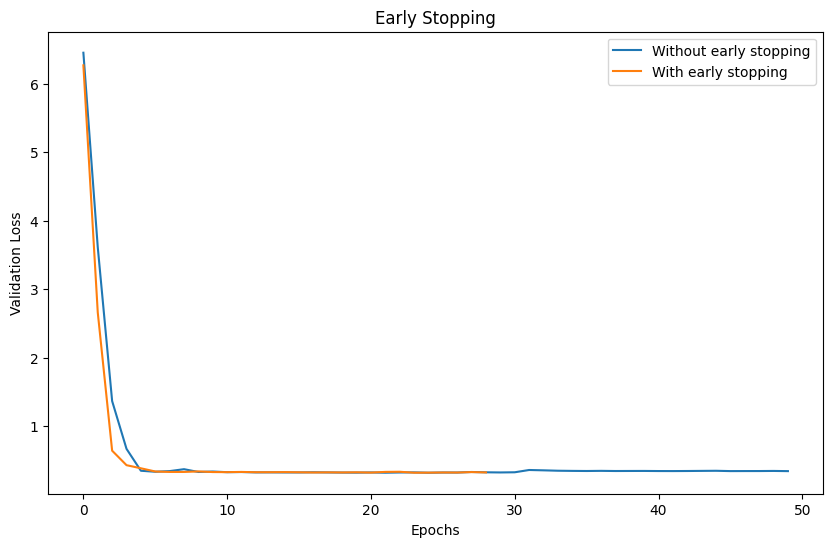

In [153]:
plt.figure(figsize=(10,6))
plt.plot(history1.history['val_loss'], label="Without early stopping")
plt.plot(history2.history['val_loss'], label="With early stopping")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.title("Early Stopping")
plt.show()

### Early stopping helped improve test accuracy as it reduced the number of training epochs which reduced overfitting as it watches the change in val_loss to stop when there is no valuable change


## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

1- optimizers control how the weights are updated

-smaller batch size have noisier gradient updates but have better generalization while larger batch size have faster training and less noisy updates

-regularization reduces overfitting

-early stopping helps stop overfitting when there is no improvement in performance 

-validation helps better tune the model

2-my choices:

optimizer:ADAM

batch size: 32

regularization: dropout to have higher peak val accuracy while L2 to have more stabalized training

early stopping: yes and save the best weights
